In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
sunspots = sm.datasets.sunspots.load_pandas().data

In [4]:
sunspots.tail(5)

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


In [5]:
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
del sunspots["YEAR"]
sunspots.head(5)

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


<Axes: >

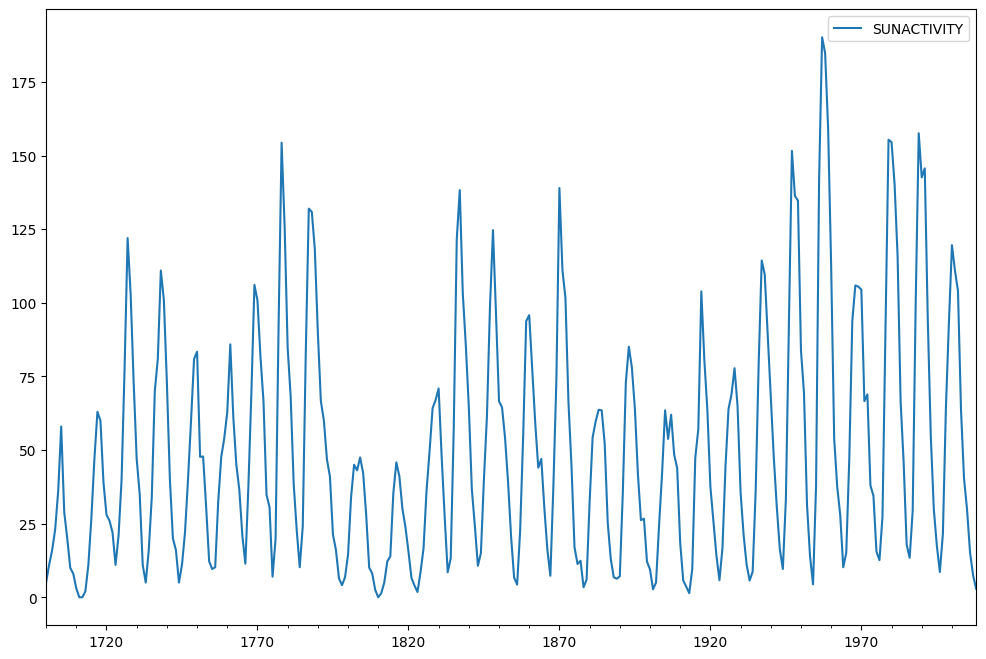

In [6]:
sunspots.plot(figsize=(12, 8))

In [7]:
from statsmodels.tsa.stattools import adfuller
def adf_test(ts):
    print("Results of ADF:")
    dftest = adfuller(ts, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=["Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used"]
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [8]:
adf_test(sunspots["SUNACTIVITY"])

Results of ADF:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


Based upon the significance level of 0.05 and the p-value of ADF test, the null hypothesis can not be rejected. Hence, the series is non-stationary.

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

Case 1: Both tests conclude that the series is not stationary - The series is not stationary
Case 2: Both tests conclude that the series is stationary - The series is stationary
Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.